<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Thu Dec 21 18:34:33 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch
from torch import nn
# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

2.1.0+cu121


## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
"""
healthcare - analyzing mamograms for cancer
retail - see what customers grab and charge them without a cashier
automotive - self driving vehicles
"""

'\nhealthcare - analyzing mamograms for cancer\nretail - see what customers grab and charge them without a cashier \nautomotive - self driving vehicles\n'

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [4]:
"""
Overfitting in machine learning occurs when a model exactly replicates patterns in the training
data instead of discovering general trends that can be used on new data.
"""

'\nOverfitting in machine learning occurs when a model exactly replicates patterns in the training \ndata instead of discovering general trends that can be used on new data.\n'

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [5]:
"""
build a simpler model (ie regularization)
use more training data
perform cross validation in the training step
"""

'\nbuild a simpler model (ie regularization)\nuse more training data\nperform cross validation in the training step\n'

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [6]:
"""
split into rgb channels
combine vals from each channel, with diff weights and bias, for neurons in first conv layer
relu for non lin adjustment
second conv layer
second relu
maxpool to reduce complexity of image
repeat conv, relu, maxpool
flatten to 1d vector and take softmax for output layer
"""

'\nsplit into rgb channels\ncombine vals from each channel, with diff weights and bias, for neurons in first conv layer\nrelu for non lin adjustment\nsecond conv layer\nsecond relu\nmaxpool to reduce complexity of image\nrepeat conv, relu, maxpool\nflatten to 1d vector and take softmax for output layer\n'

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [7]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [8]:
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,
    download = True,
    transform= ToTensor(),
    target_transform = None
)

test_data = torchvision.datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 276226712.94it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 103446365.35it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 86306237.17it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22706232.14it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [9]:
import matplotlib.pyplot as plt

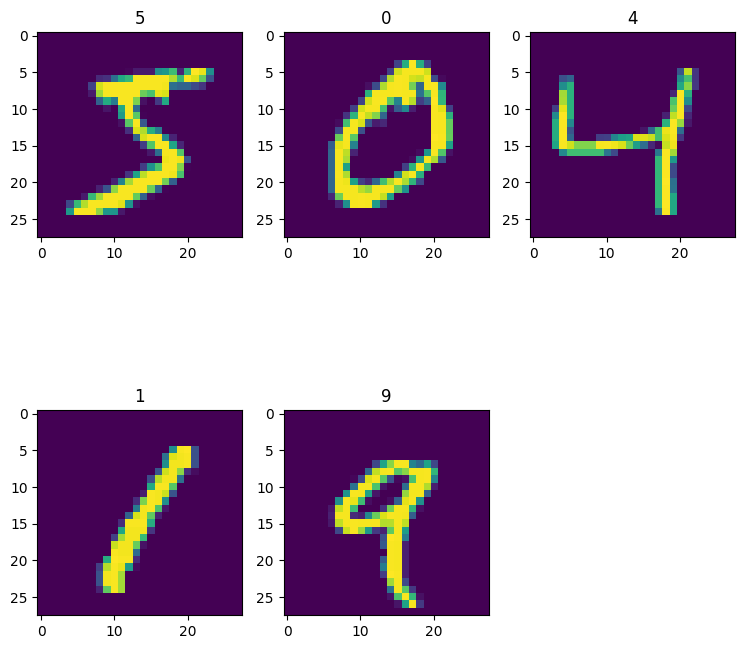

In [10]:
fig = plt.figure(figsize = (9,9))
for i in range(5):
  image, label = train_data[i]
  plt.subplot(2,3,i+1)
  plt.imshow(image.squeeze())
  plt.title(label)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True
                             )

test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False
                             )

In [12]:
classes = test_data.classes
image, label = train_data[0]
image.shape

torch.Size([1, 28, 28])

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [13]:
class MNISTModelv0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
      super().__init__()
      self.block_1 = nn.Sequential(
          nn.Conv2d(in_channels = input_shape,
                    out_channels = hidden_units,
                    kernel_size = 3,
                    stride = 1,
                    padding = 1),
          nn.ReLU(),
          nn.Conv2d(in_channels = hidden_units,
                    out_channels = hidden_units,
                    kernel_size = 3,
                    stride = 1,
                    padding =1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size = 2,
                       stride = 2),
          )
      self.block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
          nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(hidden_units*7*7, output_shape)
        )


  def forward(self, x):
    return self.classifier(self.block_2(self.block_1(x)))


In [14]:
model_0 = MNISTModelv0(1, 10, len(classes))

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [16]:
!pip -q install torchmetrics
import torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 9.5 MB/s eta 0:00:00


In [17]:
acc_fn = torchmetrics.Accuracy(task = 'multiclass', num_classes = len(classes))*100
from timeit import default_timer as timer

In [18]:
from tqdm.auto import tqdm

torch.manual_seed(42)

epochs = 5
cpu_start = timer()
for epoch in tqdm(range(epochs)):
  model_0.train()
  train_loss = 0
  train_acc = 0
  for batch, (X,y) in enumerate(train_dataloader):
    y_preds= model_0(X)
    loss = loss_fn(y_preds, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_acc += acc_fn(y, y_preds.argmax(dim = 1))

  train_loss/= len(train_dataloader)
  train_acc/=len(train_dataloader)

  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      test_pred = model_0(X)
      t_loss = loss_fn(test_pred, y)
      test_loss += t_loss
      test_acc += acc_fn(y, test_pred.argmax(dim =1))

    test_loss/= len(test_dataloader)
    test_acc/= len(test_dataloader)
    print(f"train loss: {train_loss:.5f} | train acc: {train_acc:.2f}% | test loss: {test_loss:.5f} | test acc: {test_acc:.2f}%")

cpu_end = timer()
cpu_total_time = cpu_end-cpu_start
print(f"total time on cpu: {cpu_total_time:.2f} seconds")



  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.27815 | train acc: 90.78% | test loss: 0.07611 | test acc: 97.55%
train loss: 0.07394 | train acc: 97.69% | test loss: 0.04650 | test acc: 98.40%
train loss: 0.05720 | train acc: 98.17% | test loss: 0.04910 | test acc: 98.40%
train loss: 0.04931 | train acc: 98.46% | test loss: 0.04835 | test acc: 98.53%
train loss: 0.04310 | train acc: 98.70% | test loss: 0.03782 | test acc: 98.77%
total time on cpu: 246.15 seconds


In [19]:
#switch to gpu
model_0.to(device)
acc_fn = acc_fn.to(device)
torch.manual_seed(99)
epochs = 5
gpu_start_time = timer()
for epoch in tqdm(range(epochs)):
  train_loss, train_acc = 0,0
  model_0.train()
  for batch, (X,y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)
    y_preds = model_0(X)
    loss = loss_fn(y_preds, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_acc += acc_fn(y, y_preds.argmax(dim = 1))

  train_loss/= len(train_dataloader)
  train_acc /= len(train_dataloader)

  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      X, y = X.to(device), y.to(device)
      test_preds = model_0(X)
      t_loss = loss_fn(test_preds, y)
      test_loss += t_loss
      test_acc += acc_fn(y, test_preds.argmax(dim=1))

    test_loss/= len(test_dataloader)
    test_acc/= len(test_dataloader)
    print(f"train loss: {train_loss:.5f} | train acc: {train_acc:.2f}% | test loss: {test_loss:.5f} | test acc: {test_acc:.2f}%")

gpu_end = timer()
gpu_total_time = gpu_end - gpu_start_time
print(f"total time on gpu: {gpu_total_time:.2f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 0.03926 | train acc: 98.81% | test loss: 0.03350 | test acc: 98.93%
train loss: 0.03563 | train acc: 98.88% | test loss: 0.04283 | test acc: 98.56%
train loss: 0.03295 | train acc: 98.95% | test loss: 0.03552 | test acc: 98.85%
train loss: 0.03176 | train acc: 99.00% | test loss: 0.03141 | test acc: 98.98%
train loss: 0.02939 | train acc: 99.06% | test loss: 0.03722 | test acc: 98.84%
total time on gpu: 119.01 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [20]:
import random
random.seed(99)
test_sample = []
test_label = []
for sample, label in random.sample(list(test_data), k = 9):
  test_sample.append(sample)
  test_label.append(label)

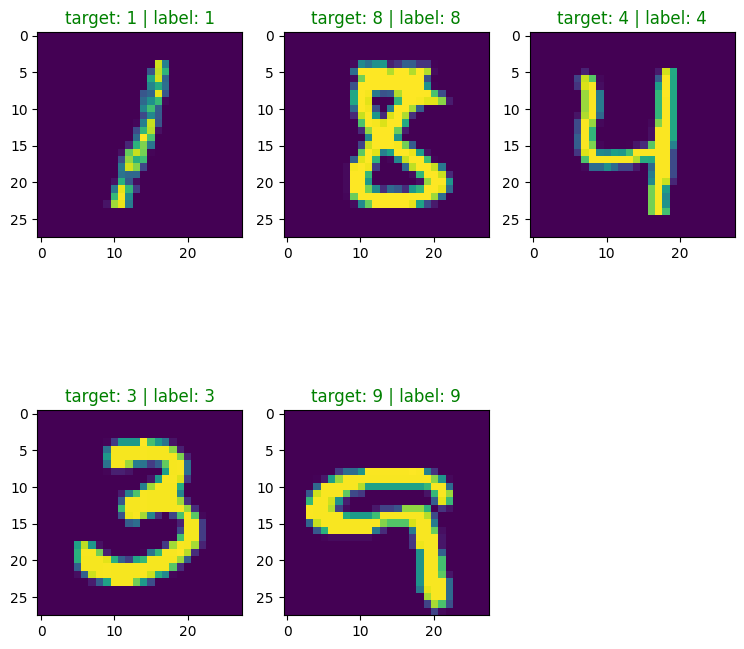

In [22]:
model_0.to(device)
model_0.eval()
preds = []
with torch.inference_mode():
  for sample in test_sample:
    sample = sample.to(device)
    sample = torch.unsqueeze(sample, dim = 0).to(device)
    #forward pass
    pred_logit = model_0(sample)
    #turn logit to pred prob
    pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
    preds.append(pred_prob.cpu())

figure = plt.figure(figsize = (9,9))
for i in range(5):
  plt.subplot(2,3,i+1)
  plt.imshow(test_sample[i].squeeze())
  if preds[i].argmax(dim = 0) == test_label[i]:
    plt.title(f"target: {preds[i].argmax(dim = 0)} | label: {test_label[i]}", c = 'g')
  else:
    plt.title(f"target: {preds[i].argmax(dim = 0)} | label: {test_label[i]}", c = 'r')


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [26]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [27]:
#make predictions for all test data
y_preds = []
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc= 'Making predictions'):
    X, y = X.to(device), y.to(device)
    logits = model_0(X)
    pred = torch.softmax(logits, dim = 1).argmax(dim = 1)
    y_preds.append(pred.cpu())

y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

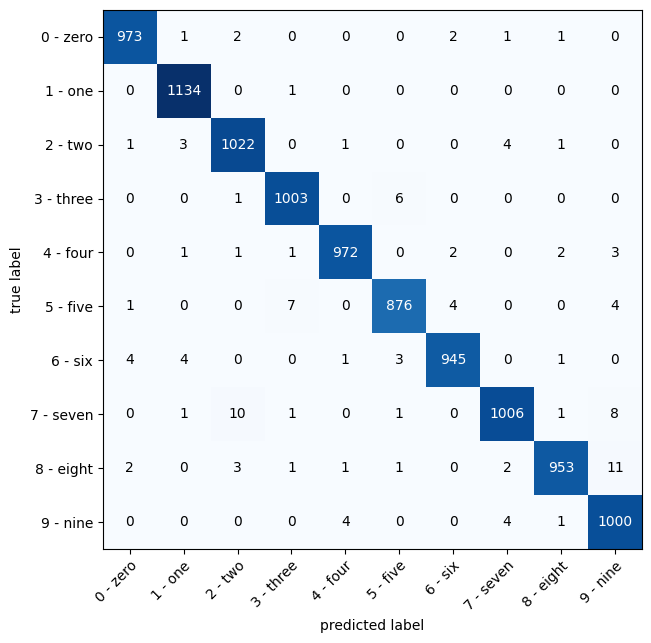

In [29]:
confmat = ConfusionMatrix(num_classes = len(classes), task = 'multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = classes,
    figsize = (10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [32]:
torch.manual_seed(42)
rand = torch.randn([1,3,64,64])
rand

tensor([[[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
          [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
          [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
          ...,
          [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
          [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
          [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

         [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
          [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
          [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
          ...,
          [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
          [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
          [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

         [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
          [-1.4647, -1.9571,  

In [54]:
conv = nn.Conv2d(in_channels = 3,
                 out_channels = 2,
                 kernel_size = 5,
                 stride = 2,
                 padding = 1)

In [56]:
print(rand.shape)
print(conv(rand).shape)
conv(rand)
#as kernel size goes up by 1, length and width of ouput tensor decreases by 1 and vice versa

torch.Size([1, 3, 64, 64])
torch.Size([1, 2, 31, 31])


tensor([[[[ 0.0059, -0.8168, -0.6203,  ...,  0.0399,  0.0231, -0.5201],
          [ 0.4216, -0.5141, -0.7409,  ..., -0.1794,  1.2391, -0.3196],
          [ 0.6680, -1.1947,  0.4465,  ..., -1.1249, -0.1329, -0.5913],
          ...,
          [ 0.8836,  0.5261,  0.0036,  ..., -0.3338, -1.1811, -0.4421],
          [ 0.3546, -0.9436, -0.4342,  ...,  0.1002, -0.4691, -0.9416],
          [ 0.1310, -0.6757,  0.3750,  ...,  0.0522,  0.1548, -1.2898]],

         [[ 0.0958, -0.8664, -0.4312,  ..., -0.4263, -0.8194, -1.5504],
          [ 0.6210,  0.2061, -0.3024,  ..., -0.3008,  0.4604, -0.2948],
          [ 0.8066,  0.2006,  0.9617,  ...,  0.5886,  0.0942, -1.1128],
          ...,
          [ 0.6265,  0.7886,  0.5918,  ..., -0.1282,  0.1274, -0.1246],
          [-0.6394,  0.0147,  0.1350,  ..., -0.1988,  0.4826, -1.1603],
          [-0.4193, -0.1634,  0.7674,  ..., -0.3975,  0.7203, -0.7266]]]],
       grad_fn=<ConvolutionBackward0>)

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [57]:
train_data2 = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

test_data2 = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 26421880/26421880 [00:00<00:00, 125213145.49it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 34282714.64it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 67481054.17it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6358149.88it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [58]:
train_dataloader2 = DataLoader(
    dataset = train_data2,
    batch_size = BATCH_SIZE,
    shuffle = True
)

test_dataloader2 = DataLoader(
    dataset = test_data2,
    batch_size = BATCH_SIZE,
    shuffle = False
)

In [61]:
classes2 = train_data2.classes

In [74]:
model_1 = MNISTModelv0(input_shape=1, hidden_units= 10, output_shape = len(classes2))
model_1.to(device)
loss_fn2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [75]:
torch.manual_seed(42)
epochs = 3
train_loss2 = 0
for epoch in tqdm(range(epochs)):
  for batch, (X,y) in enumerate(train_dataloader2):
    model_1.train()
    X, y = X.to(device), y.to(device)
    y_pred = model_1(X)
    loss = loss_fn2(y_pred, y)
    train_loss2 += loss
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
  train_loss2/= len(train_dataloader2)

  model_1.eval()
  with torch.inference_mode():
    test_loss2 = 0
    for X, y in test_dataloader2:
      X, y = X.to(device), y.to(device)
      test_pred = model_1(X)
      test_loss2 = loss_fn2(test_pred, y)
      test_loss2 += test_loss2
    test_loss2/=len(test_dataloader2)
  print(f"train loss: {train_loss2:.5f} | test_loss: {test_loss2:.5f}")

  0%|          | 0/3 [00:00<?, ?it/s]

train loss: 0.66472 | test_loss: 0.00114
train loss: 0.36262 | test_loss: 0.00049
train loss: 0.32460 | test_loss: 0.00066


In [102]:
random.seed(42)
test_samples2 = []
test_labels2 =[]
for sample, label in list(test_data2):
  test_samples2.append(sample)
  test_labels2.append(label)


In [124]:
preds = []
model_1.eval()
with torch.inference_mode():
  for sample in test_samples2:
    sample = torch.unsqueeze(sample, dim =0).to(device)
    logit = model_1(sample)
    prob=torch.softmax(logit.squeeze(), dim = 0).cpu()
    preds.append(prob)
preds = torch.stack(preds)

In [128]:
pred_classes = preds.argmax(dim =1)

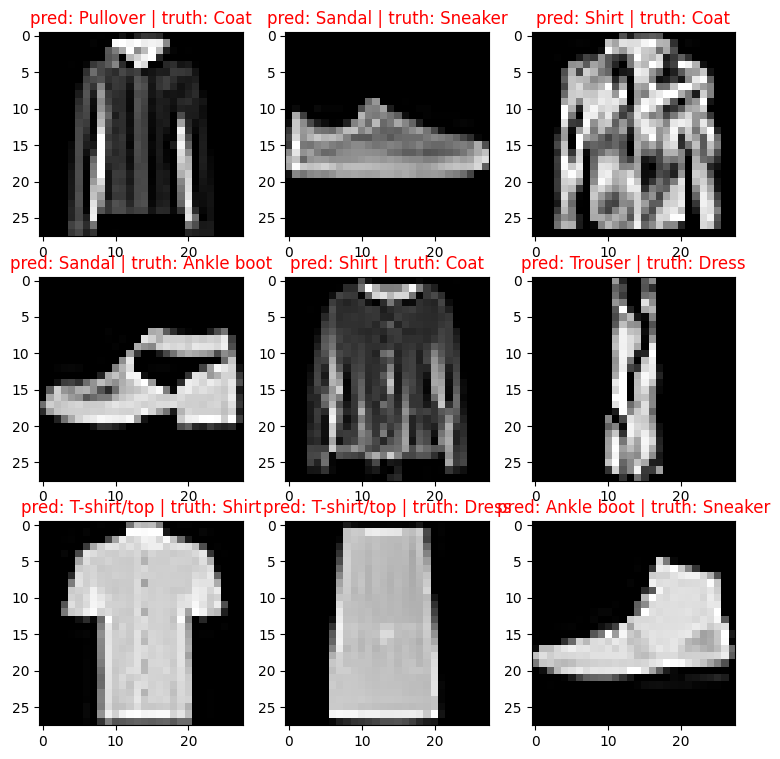

In [136]:
plt.figure(figsize = (9,9))
count = 0

for i, sample in enumerate(test_samples2):
  pred_label = classes2[pred_classes[i]]
  truth_label = classes2[test_labels2[i]]
  if pred_label != truth_label and count < 9:
    plt.subplot(3,3,count+1)

    plt.imshow(sample.squeeze(), cmap = 'gray')
    count +=1
    plt.title(f"pred: {pred_label} | truth: {truth_label}", c = 'r')

In [138]:
"""
I think the model could be somewhat improved, but a large amount of error seems to stem from
unclear decision boundaries in how the data is labeled. Some of these pictures are hard to fit
in one class (ie a sneaker that looks like a boot, a shirt that looks like a tshirt).
"""

'\nI think the model could be somewhat improved, but a large amount of error seems to stem from \nunclear decision boundaries in how the data is labeled. Some of these pictures are hard to fit\nin one class (ie a sneaker that looks like a boot, a shirt that looks like a tshirt). \n'